In [145]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [146]:
import numpy as np
import pandas as pd

In [147]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [148]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [149]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [150]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables'
Base.prepare(engine, reflect=True)

In [151]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [152]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [153]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [154]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f50d5313a0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [155]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f50d56f4c0>,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

In [156]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
measurement_frame = pd.DataFrame(data_prep_scr)
measurement_frame.set_index('date')
by_date = measurement_frame.sort_values('date')
by_date_df = by_date.dropna()
by_date_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


In [157]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

# Calculate the date 1 year ago from the last data point in the database
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_prep_scr = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= last_year).\
order_by(Measurement.date).all()
list_date = list(np.ravel(data_prep_scr))
print(list_date)


['2016-08-24', 0.08, '2016-08-24', 2.15, '2016-08-24', 2.28, '2016-08-24', None, '2016-08-24', 1.22, '2016-08-24', 2.15, '2016-08-24', 1.45, '2016-08-25', 0.08, '2016-08-25', 0.08, '2016-08-25', 0.0, '2016-08-25', 0.0, '2016-08-25', 0.21, '2016-08-25', 0.06, '2016-08-25', 0.11, '2016-08-26', 0.0, '2016-08-26', 0.03, '2016-08-26', 0.02, '2016-08-26', 0.04, '2016-08-26', 0.0, '2016-08-26', 0.01, '2016-08-27', 0.0, '2016-08-27', 0.18, '2016-08-27', 0.02, '2016-08-27', 0.0, '2016-08-27', 0.12, '2016-08-27', None, '2016-08-28', 0.01, '2016-08-28', 0.14, '2016-08-28', 0.14, '2016-08-28', 0.14, '2016-08-28', 0.6, '2016-08-28', 2.07, '2016-08-29', 0.0, '2016-08-29', 0.17, '2016-08-29', 0.04, '2016-08-29', None, '2016-08-29', 0.0, '2016-08-29', 0.35, '2016-08-29', 0.9, '2016-08-30', 0.0, '2016-08-30', 0.0, '2016-08-30', 0.02, '2016-08-30', 0.0, '2016-08-30', 0.0, '2016-08-30', 0.05, '2016-08-31', 0.13, '2016-08-31', 0.1, '2016-08-31', None, '2016-08-31', None, '2016-08-31', 0.25, '2016-08-31', 

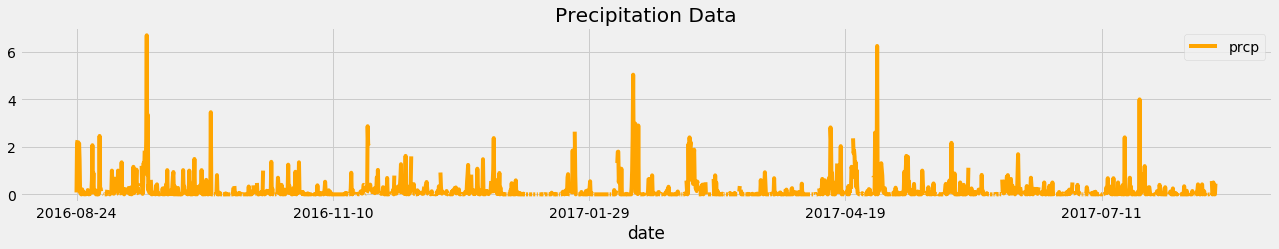

In [158]:
# Use Pandas Plotting with Matplotlib to plot the data
plot_data = by_date.plot(title="Precipitation Data", x='date', y='prcp', color = 'orange', figsize=(20,3)).get_figure()

In [159]:
# Use Pandas to calcualte the summary statistics for the precipitation data
by_date.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [160]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Measurement.station)).all()
print(f'There are {stations} stations')

There are [(19550,)] stations


In [161]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active = active_stations [0][0]

print(f'The most active station is {most_active}')

print('-----------------------------------------')

print('The list of stations are the next:')

for active_stations in active_stations:
    print(active_stations[0], "   ", active_stations[1])


The most active station is USC00519281
-----------------------------------------
The list of stations are the next:
USC00519281     2772
USC00519397     2724
USC00513117     2709
USC00519523     2669
USC00516128     2612
USC00514830     2202
USC00511918     1979
USC00517948     1372
USC00518838     511


In [162]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temperature = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()

lowest_temperature = temperature [0][0]
highest_temperature = temperature [0][1]
avg_temperature = temperature [0][2]


print(f'The lowest temperature is {lowest_temperature}')
print(f'The highest temperature is {highest_temperature}')
print(f'The average temperature is {avg_temperature}')
                                   


The lowest temperature is 54.0
The highest temperature is 85.0
The average temperature is 71.66378066378067


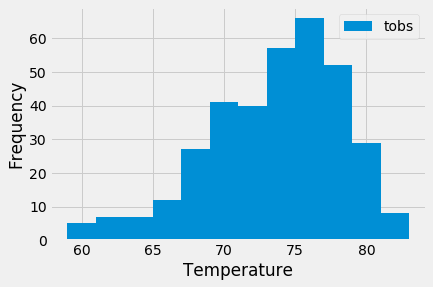

In [163]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observation = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station == most_active).filter(Measurement.date >= last_year).\
    group_by(Measurement.date).all()



temperature_df = pd.DataFrame(temperature_observation)

plt.hist(temperature_df['tobs'],12, label="tobs")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend()
plt.show()



## Bonus Challenge Assignment

In [164]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()



# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [170]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_start = dt.date(2017, 7, 10)
trip_end = dt.date(2017, 7, 23)
prev_year = dt.timedelta(days=365)

trip = (calc_temps((trip_start-prev_year), (trip_end-prev_year)))
print(trip)


[(71.0, 77.26744186046511, 82.0)]


In [176]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df = pd.DataFrame(trip, columns = ["tmin","tavg", "tmax"])

tmin = trip_df["tmin"]
tavg = trip_df["tavg"]
tmax = trip_df["tmax"]
peak = trip_df["tmax"] - trip_df["tmin"]

plt.figure(figsize = [2.5, 6])
plt.bar(tavg, peak, color='r', alpha=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["tmin", "tavg", "tmax"])
plt.title("Trip Avg Temp")
plt.ylabel("average teperature")
plt.show()


0    71.0
Name: tmin, dtype: float64


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
